In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.graph_objects as go

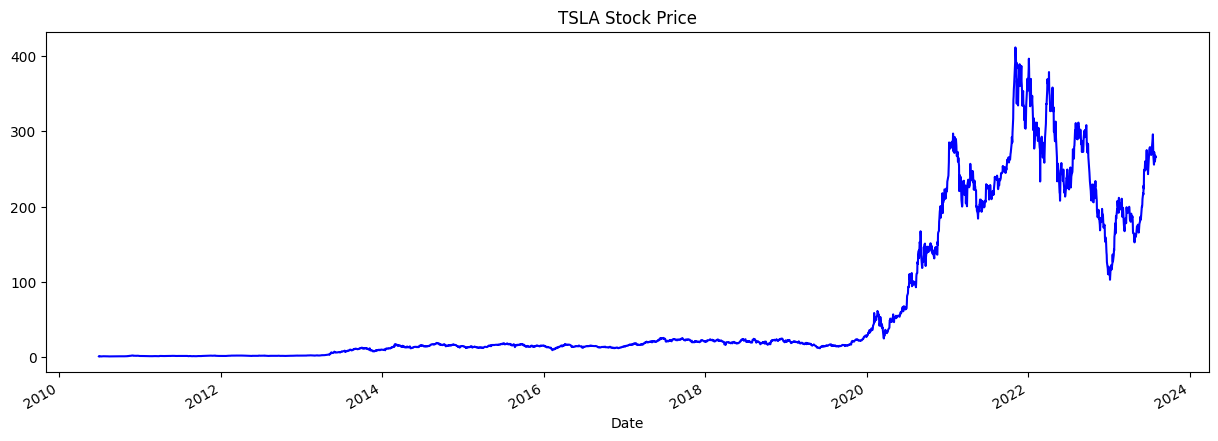

In [71]:
tsla = yf.Ticker("TSLA")
hist = tsla.history(period="max")
hist["Open"].plot(figsize=(15, 5), color='blue', title="TSLA Stock Price")
plt.show()

In [72]:
# Importing the training set
dataset_train = pd.read_csv('../LSTM-Open-price-TSLA/TSLA.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [73]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [74]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 3286):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [75]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [76]:
# Building the RNN by Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [77]:
# Initialising the RNN
regressor = Sequential()

In [78]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [79]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [80]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [81]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [82]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [83]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [84]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
101/101 [==============================] - 18s 103ms/step - loss: 0.0066
Epoch 2/25
101/101 [==============================] - 10s 100ms/step - loss: 0.0026
Epoch 3/25
101/101 [==============================] - 11s 111ms/step - loss: 0.0021
Epoch 4/25
101/101 [==============================] - 10s 102ms/step - loss: 0.0019
Epoch 5/25
101/101 [==============================] - 12s 121ms/step - loss: 0.0018
Epoch 6/25
101/101 [==============================] - 12s 118ms/step - loss: 0.0015
Epoch 7/25
101/101 [==============================] - 13s 128ms/step - loss: 0.0017
Epoch 8/25
101/101 [==============================] - 13s 127ms/step - loss: 0.0015
Epoch 9/25
101/101 [==============================] - 12s 121ms/step - loss: 0.0013
Epoch 10/25
101/101 [==============================] - 12s 122ms/step - loss: 0.0017
Epoch 11/25
101/101 [==============================] - 14s 140ms/step - loss: 0.0012
Epoch 12/25
101/101 [==============================] - 13s 128ms/step - lo

In [85]:
# Making the predictions and visualising the results By Getting the real and predicted stock price

dataset_test = pd.read_csv('../LSTM-Open-price-TSLA/TSLA.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 3346): #we have 3286 in dataset so we will calculate the range from (60 + 3286 = 3346),
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


103/103 [==============================] - 7s 42ms/step


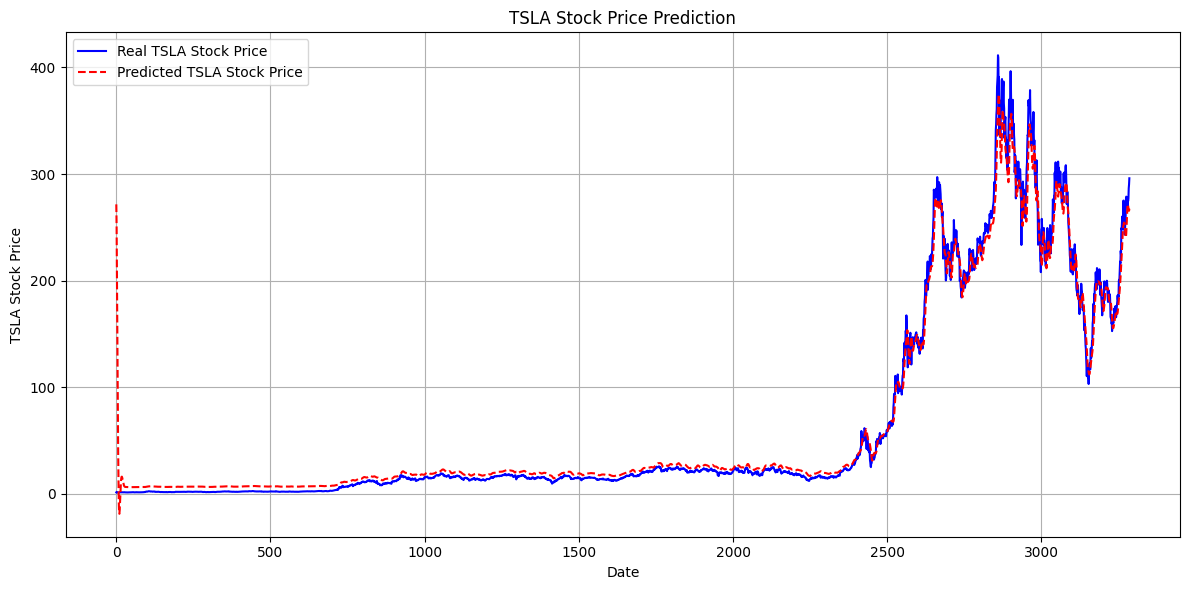

In [86]:
# Visualising the results
plt.figure(figsize=(12, 6)) 
plt.plot(real_stock_price, color='blue', linestyle='-', label='Real TSLA Stock Price')
plt.plot(predicted_stock_price, color='red', linestyle='--', label='Predicted TSLA Stock Price')
plt.title('TSLA Stock Price Prediction')
plt.xlabel('Date') 
plt.ylabel('TSLA Stock Price')
plt.grid(True) 
plt.legend(loc='upper left') 
plt.tight_layout() 
plt.show()




In [87]:
#The End